In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [249]:
df = pd.read_csv('superstore.csv', encoding='windows-1252')

In [250]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [252]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [253]:
df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month
df['OrderD']=df['Order Date'].dt.day

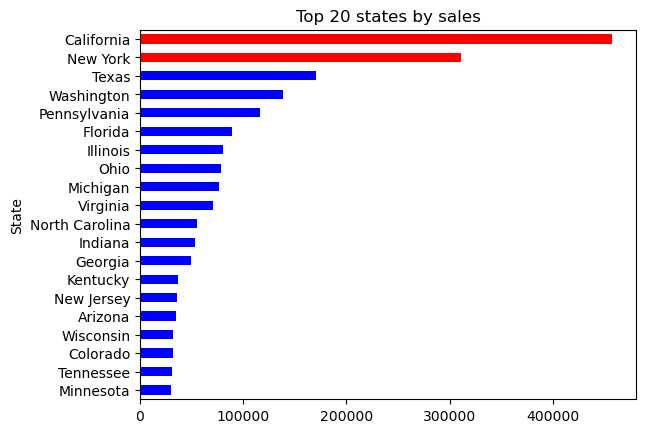

In [254]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors)
plt.title('Top 20 states by sales');

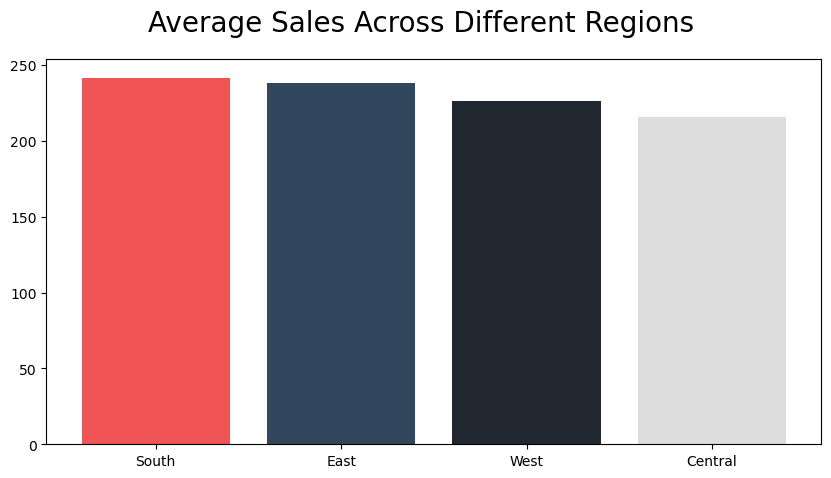

In [255]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_bar = df[['Region','Sales']]

# Grouping the DataFrame based on Regions and taking mean of profit across each of them.
# The reason for sorting is to show the larger values at the beginning (Best Practice)
df_bar = df_bar.groupby('Region').mean().sort_values(by='Sales', ascending=False)

plt.figure(figsize=[10,5]) # Setting the figure size

# Visualizing using Bar Chart
plt.suptitle("Average Sales Across Different Regions", size=20)

# Plotting the BarChart
plt.bar(x=df_bar.index, height='Sales', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

plt.show()

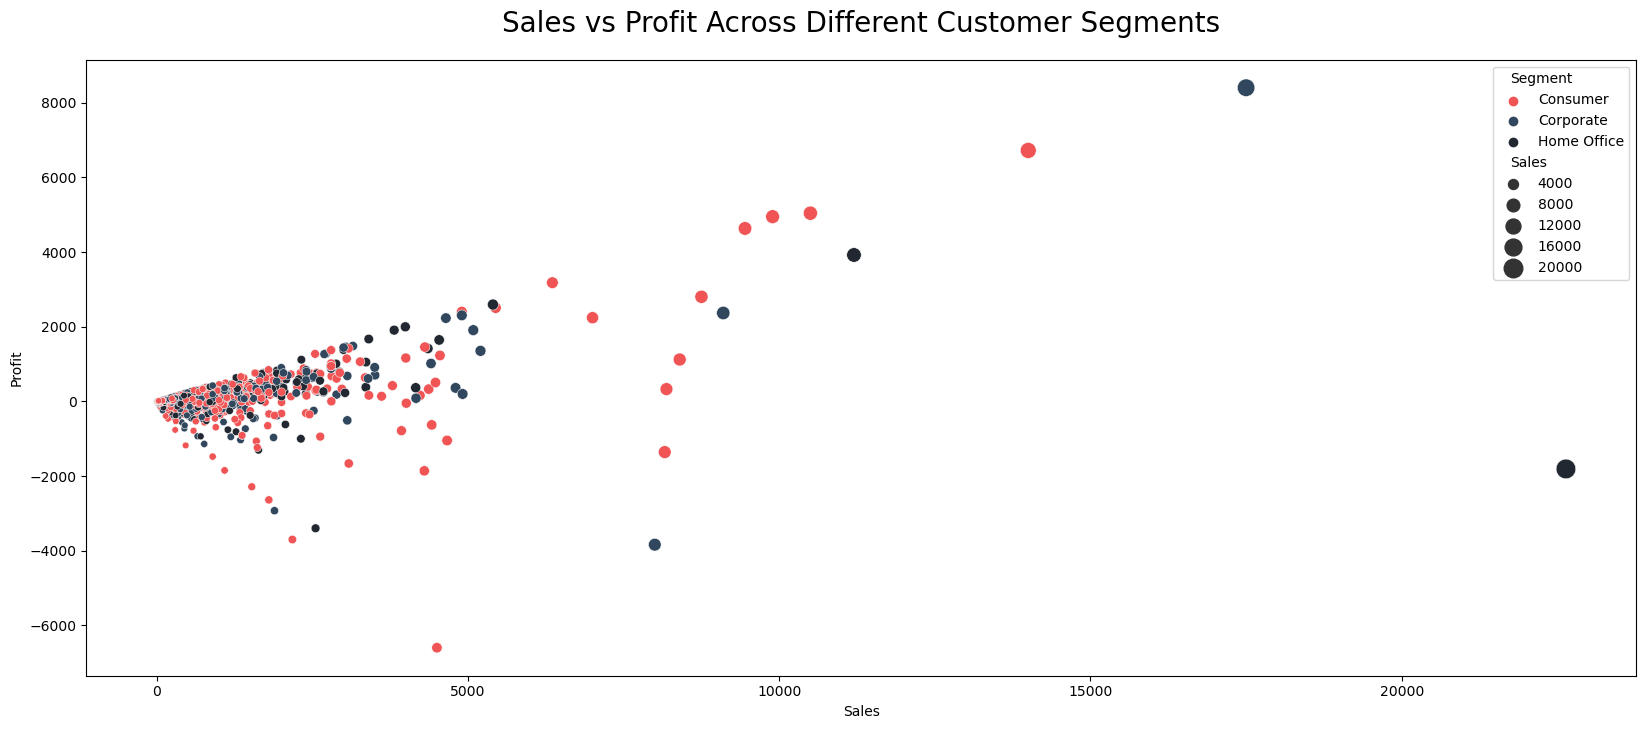

In [256]:
df_scatter = df[['Sales','Profit','Segment']]

# Visualizing the ScatterPlot
plt.figure(figsize=[20,8])
# Profit in the Y axis, and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volumen of "Sales".
sns.scatterplot(x=df_scatter['Sales'], y=df_scatter['Profit'], hue=df_scatter['Segment'],
                palette=['#F05454','#30475E','#222831'], size=df_scatter["Sales"], sizes=(20,200), legend='auto') 
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

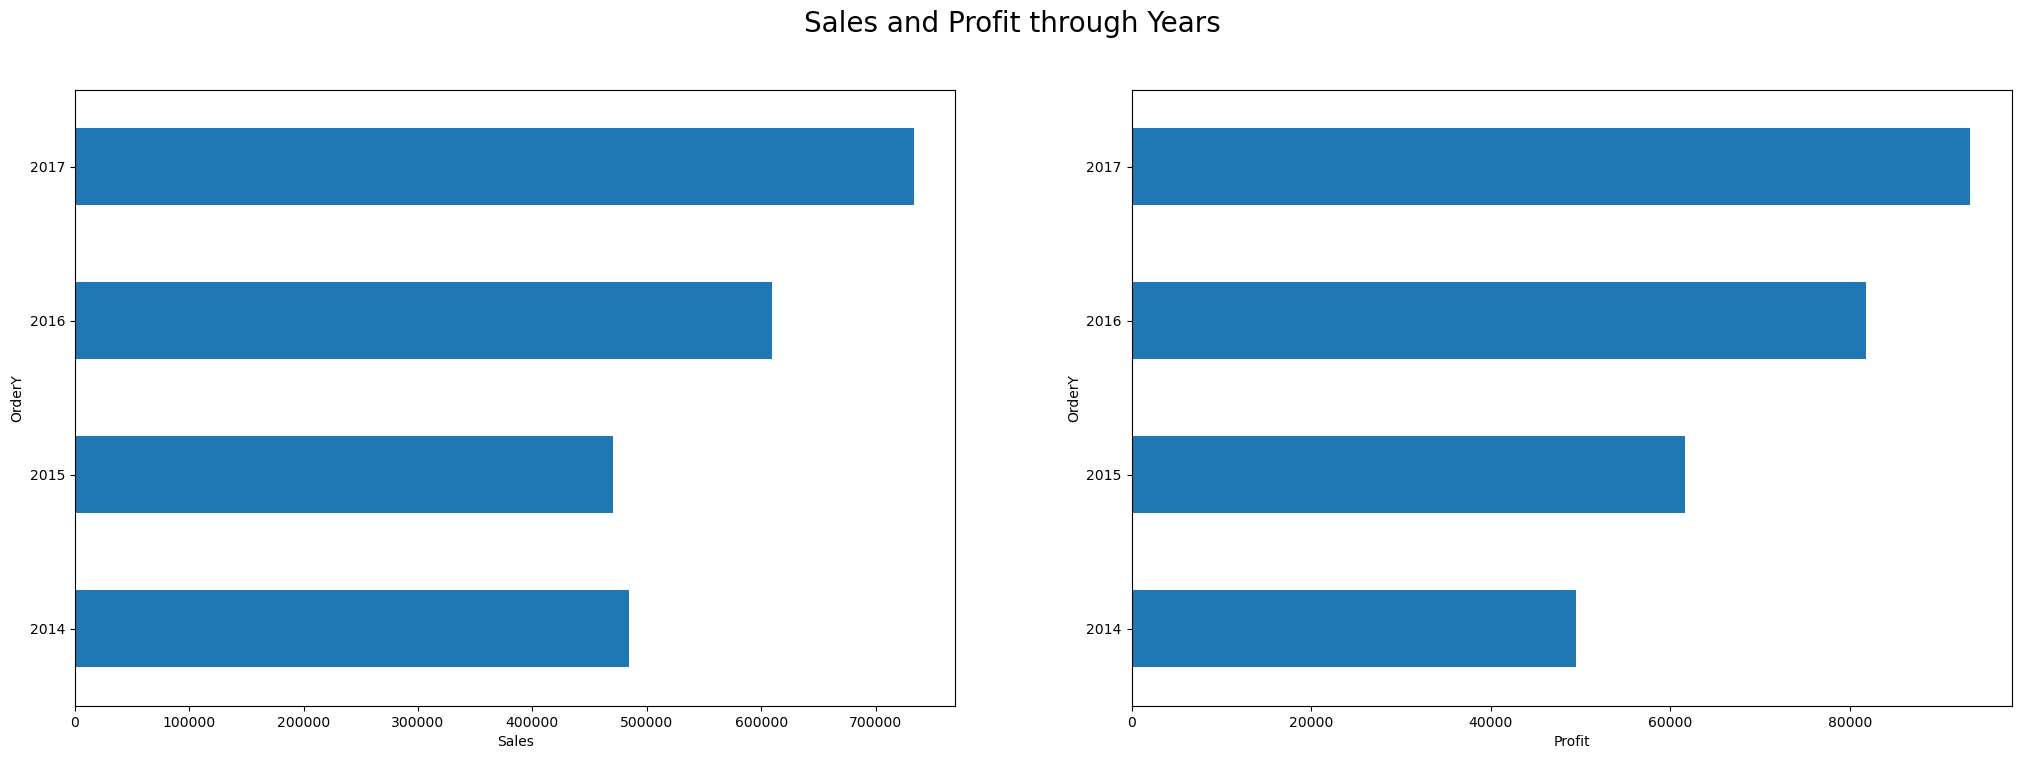

In [257]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
df.groupby('OrderY')['Sales'].sum().plot.barh()
plt.xlabel('Sales')
plt.subplot(1,2,2)
df.groupby('OrderY')['Profit'].sum().plot.barh()
plt.xlabel('Profit')
plt.suptitle('Sales and Profit through Years',size=20);

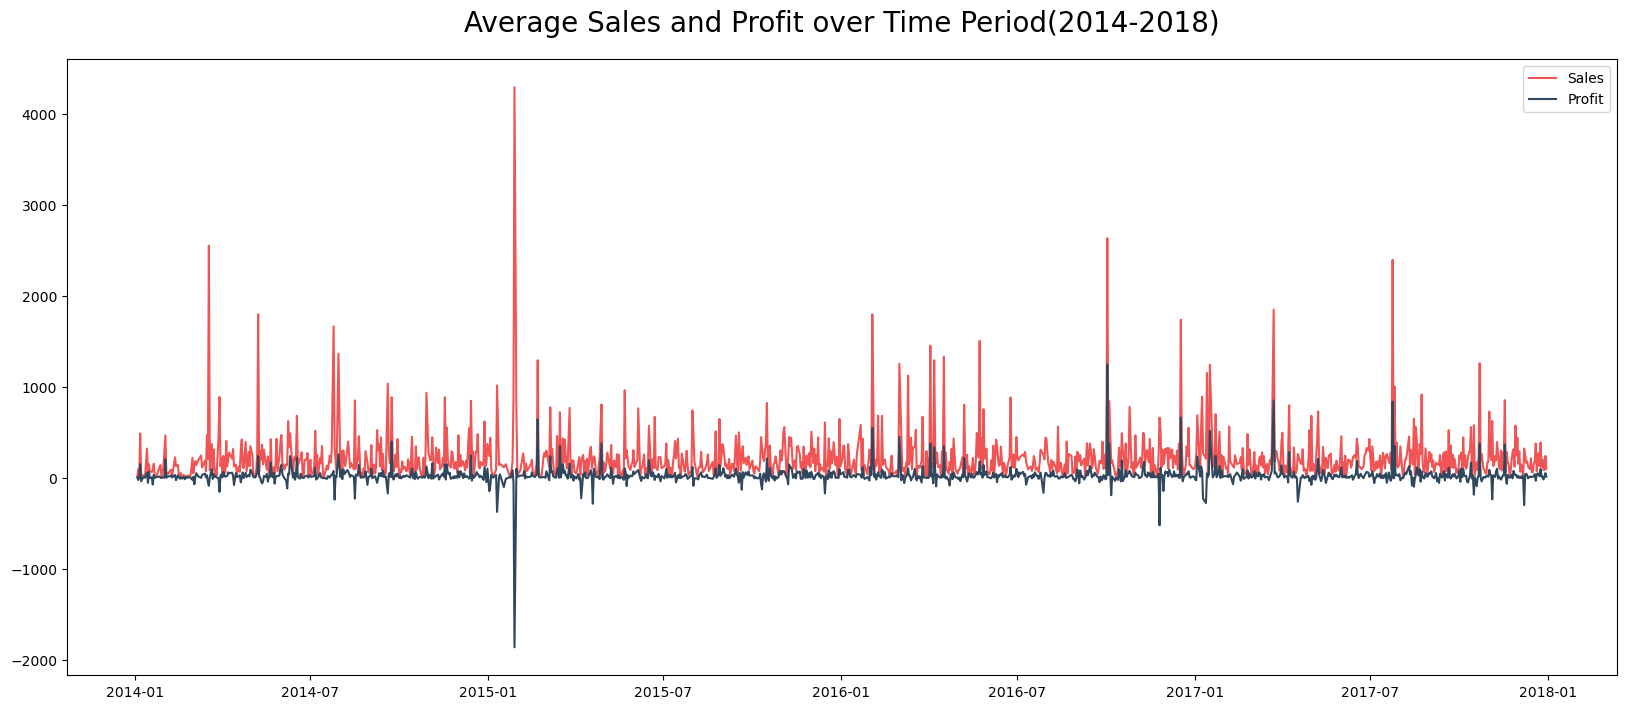

In [258]:
df_line = df[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) # Converting into DateTime
df_line = df_line.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[20,8])
plt.plot(df_line.index, 'Sales', data=df_line, color='#F05454') # Avg Sales over Time
plt.plot(df_line.index, 'Profit', data=df_line, color='#30475E') # Avg Profit over Time
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20)
plt.legend()
plt.show()

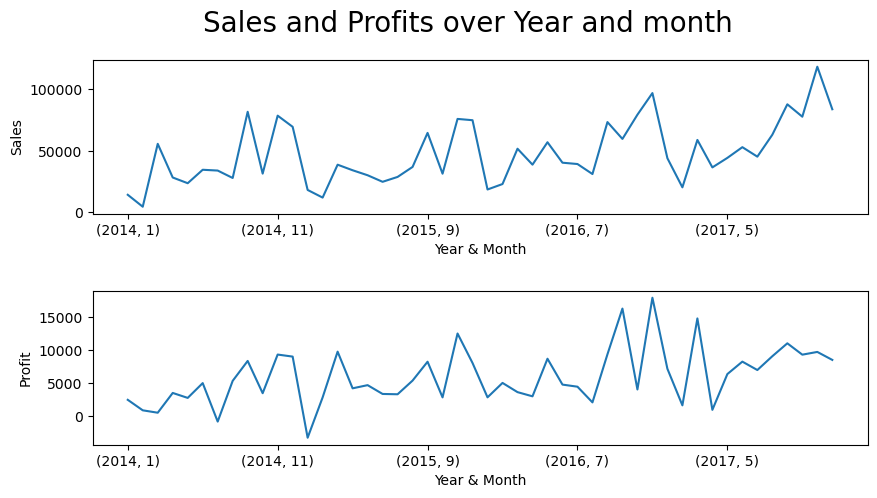

In [259]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
df.groupby(['OrderY','OrderM'])['Sales'].sum().plot()
plt.xlabel('Year & Month')
plt.ylabel('Sales')
plt.subplot(2,1,2)
df.groupby(['OrderY','OrderM'])['Profit'].sum().plot()
plt.xlabel('Year & Month')
plt.ylabel('Profit')
plt.suptitle('Sales and Profits over Year and month',size=20);

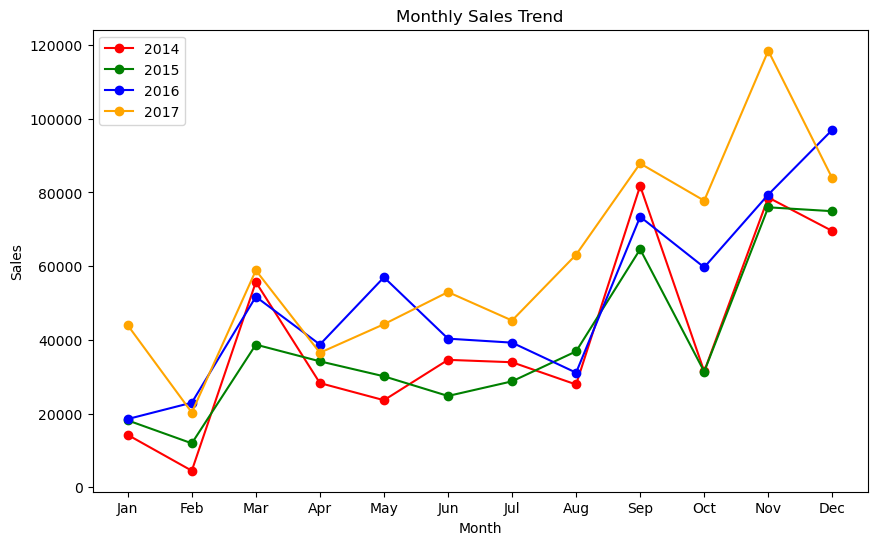

In [260]:
import itertools
# Group the data by month, year, and calculate the total sales
monthly_sales = df.groupby(['OrderM', 'OrderY'])['Sales'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Get unique years and cycle through colors
years = monthly_sales['OrderY'].unique()
colors = itertools.cycle(['red', 'green', 'blue', 'orange', 'purple'])

for year in years:
    year_data = monthly_sales[monthly_sales['OrderY'] == year]
    plt.plot(year_data['OrderM'], year_data['Sales'], marker='o', color=next(colors), label=str(year))

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')

# Customize x-axis ticks to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)


plt.legend()

plt.show()

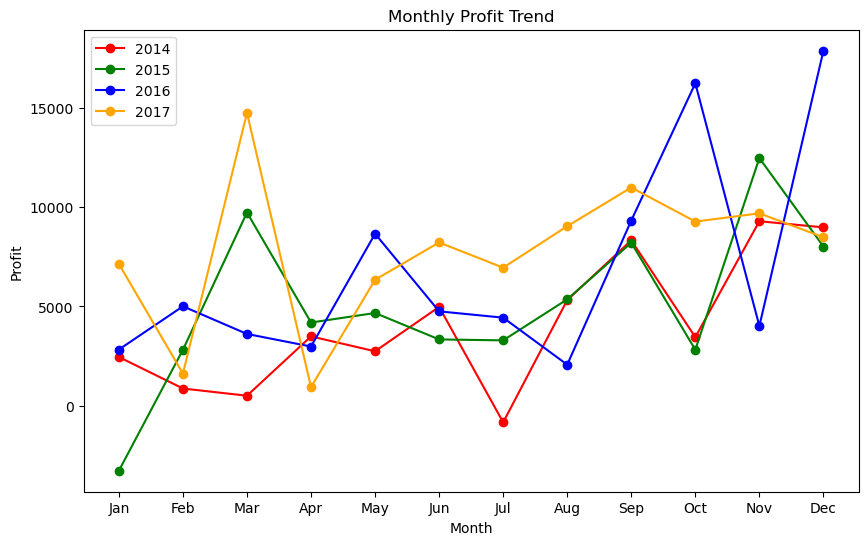

In [261]:
import itertools
# Group the data by month, year, and calculate the total sales
monthly_sales = df.groupby(['OrderM', 'OrderY'])['Profit'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Get unique years and cycle through colors
years = monthly_sales['OrderY'].unique()
colors = itertools.cycle(['red', 'green', 'blue', 'orange', 'purple'])

for year in years:
    year_data = monthly_sales[monthly_sales['OrderY'] == year]
    plt.plot(year_data['OrderM'], year_data['Profit'], marker='o', color=next(colors), label=str(year))

plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit Trend')

# Customize x-axis ticks to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)


plt.legend()

plt.show()

In [262]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderY,OrderM,OrderD
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


In [284]:
df2 = df.groupby(['OrderY', 'OrderM'])['Sales'].sum().reset_index()
df2['Date'] = pd.to_datetime(df2['OrderY'].astype(str) + '-' + df2['OrderM'].astype(str), format='%Y-%m')
df2.drop(['OrderY','OrderM'],axis=1,inplace=True)

In [288]:
df2.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

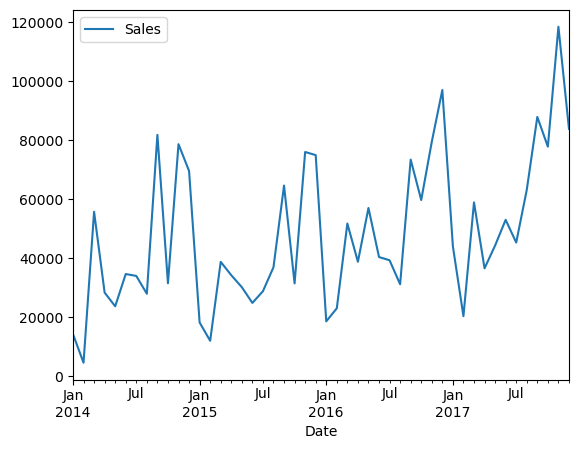

In [289]:
df2.plot()

In [290]:
sales_series = df2['Sales']
autocorr_values = sales_series.autocorr()
print("Autocorrelation:", autocorr_values)

Autocorrelation: 0.37648121130453654


In [266]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [291]:
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test.
result = sm.tsa.adfuller(df2['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -4.493767844002666
p-value: 0.00020180198458237704
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064


C:\Users\jithi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


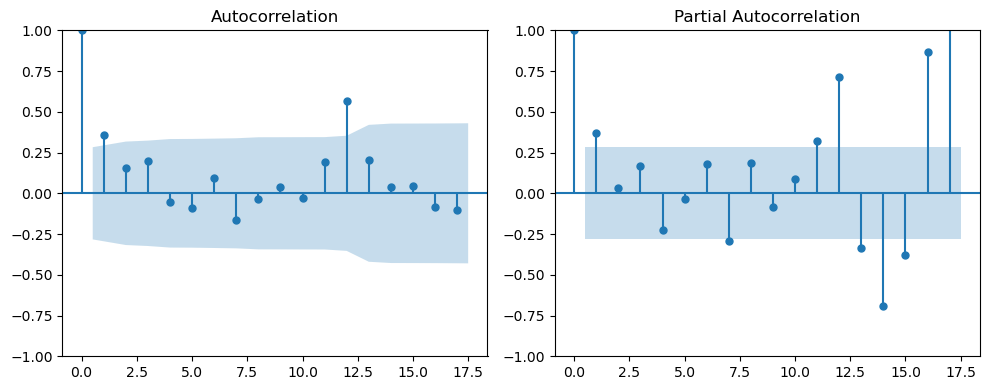

In [292]:
# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(121)
plot_acf(df2['Sales'], ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
ax2 = plt.subplot(122)
plot_pacf(df2['Sales'], ax=ax2)

plt.tight_layout()
plt.show()

In [269]:
# Split the data into training and testing sets.
#train_size = int(len(df) * 0.8)
#train_data = data.iloc[:train_size]
#test_data = data.iloc[train_size:]

In [295]:
# Build an ARIMA model (adjust p, d, and q based on your data and diagnostics).
p = 1  # Autoregressive order
d = 0  # Differencing order
q = 1  # Moving average order

model = sm.tsa.ARIMA(df2['Sales'], order=(p, d, q))
results = model.fit()

C:\Users\jithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [296]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -550.170
Date:                Mon, 30 Oct 2023   AIC                           1108.341
Time:                        23:36:37   BIC                           1115.825
Sample:                    01-01-2014   HQIC                          1111.169
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.786e+04   6458.298      7.410      0.000    3.52e+04    6.05e+04
ar.L1          0.6870      0.282      2.437      0.015       0.134       1.240
ma.L1         -0.3431      0.358     -0.957      0.339      -1.046       0.359
sigma2      5.094e+08      0.082   6.24e+09      0.000    5.09e+08    5.09e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.96   Prob(JB):                         0.52
Heteroskedasticity (H):               1.06   Skew:                             0.24
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.96e+26. Standard errors may be unstable.
"""

In [301]:
df2.reset_index()

,Date,Sales
0,2014-01-01,14236.8950
1,2014-02-01,4519.8920
2,2014-03-01,55691.0090
3,2014-04-01,28295.3450
4,2014-05-01,23648.2870
5,2014-06-01,34595.1276
6,2014-07-01,33946.3930
7,2014-08-01,27909.4685
8,2014-09-01,81777.3508
9,2014-10-01,31453.3930


<AxesSubplot:xlabel='Date'>

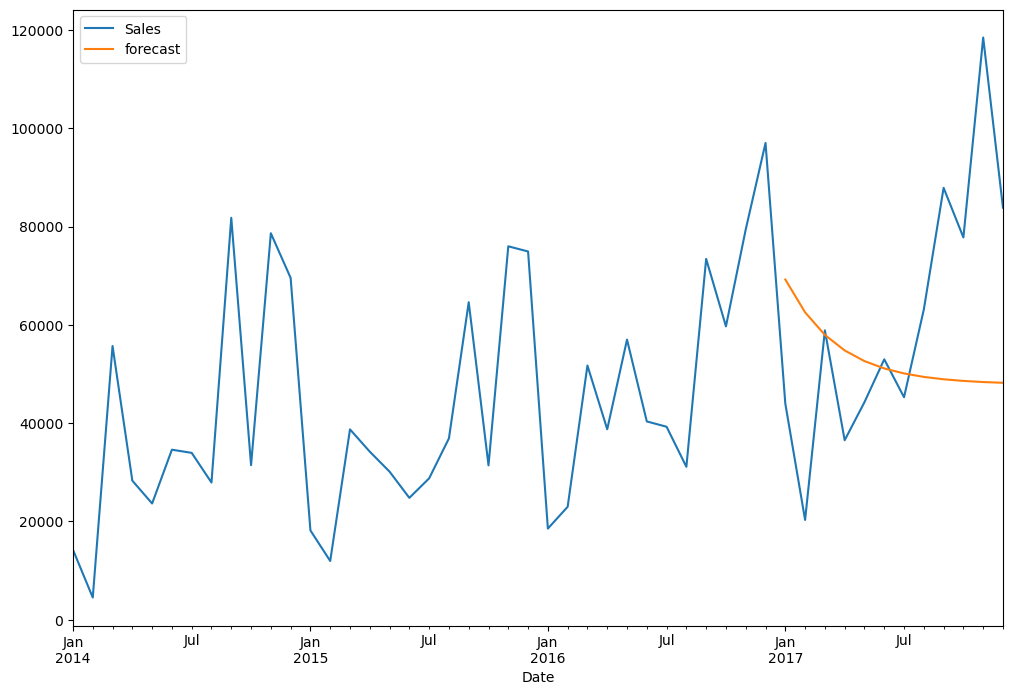

In [302]:
df2['forecast']=results.predict(start=36,end=47,dynamic=True)
df2.plot(figsize=(12,8))

In [274]:
import statsmodels.api as sm

In [303]:
model=sm.tsa.statespace.SARIMAX(df2['Sales'],order=(p, d, q),seasonal_order=(p,d,q,12))
results=model.fit()

C:\Users\jithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jithi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jithi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<AxesSubplot:xlabel='Date'>

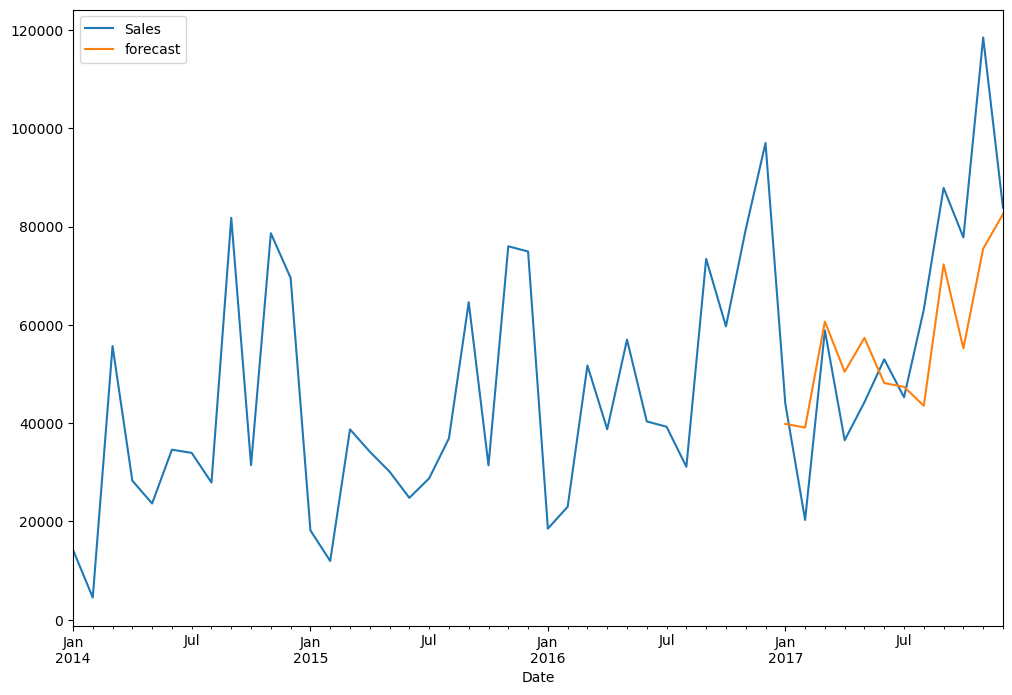

In [304]:
df2['forecast']=results.predict(start=36,end=47,dynamic=True)
df2.plot(figsize=(12,8))

In [306]:
from pandas.tseries.offsets import DateOffset
future_dates=[df2.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [307]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df2.columns)

In [308]:
future_datest_df.tail()

,Sales,forecast
2019-07-01,NaN,NaN
2019-08-01,NaN,NaN
2019-09-01,NaN,NaN
2019-10-01,NaN,NaN
2019-11-01,NaN,NaN


In [312]:
future_df=pd.concat([df2,future_datest_df])

<AxesSubplot:>

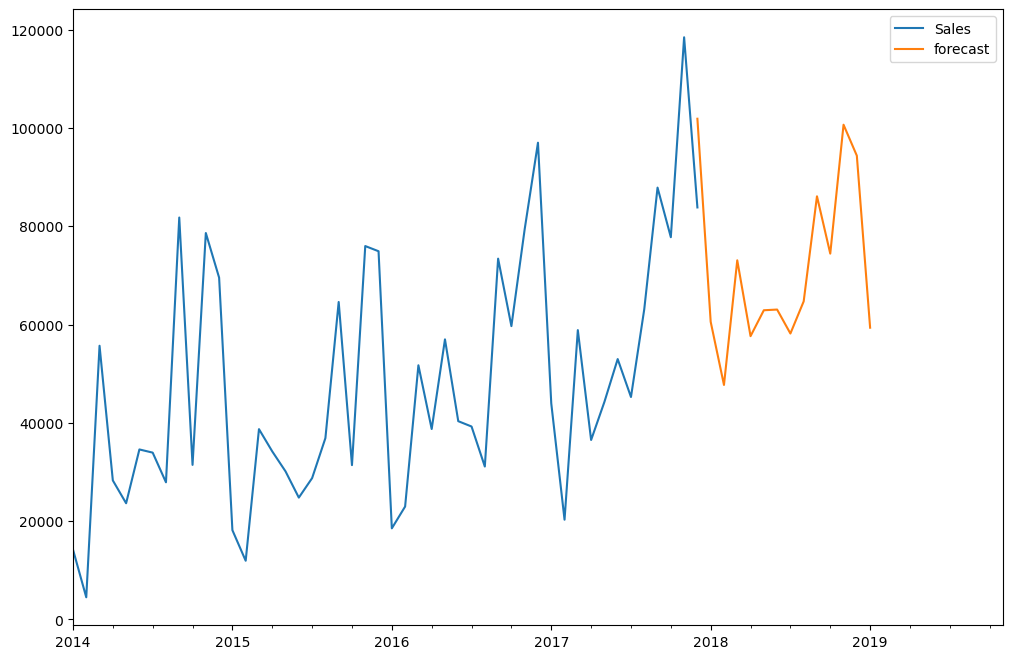

In [315]:
future_df['forecast'] = results.predict(start = 47, end = 60, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [ ]:
# Evaluate the model's performance (you can use various metrics).
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data['Value'], forecast_values)
print(f'Mean Squared Error (MSE): {mse}')

In [ ]:
# Optionally, you can retrain the model on the entire dataset for future forecasting.
model = sm.tsa.ARIMA(data['Value'], order=(p, d, q))
results = model.fit()

# Forecast future values (replace 'steps' with the number of future periods to forecast).
steps = 10
forecast_future, stderr_future, conf_int_future = results.forecast(steps)

print('Forecasted Future Values:')
print(forecast_future)

In [ ]:
a